Perform Feature Engineering  
a) Perform basic exploration like checking for top 5 records, 
shape, statistical info, duplicates, Null values etc.  
b) Extract Date, Month, Year from  Date of Journey column

# Import Required Libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [120]:
pd.set_option("display.max_columns",None)

In [121]:
train_df = pd.read_excel(r"E:\Imarticus PG Data science class\ML\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Train.xlsx")
test_df = pd.read_excel(r"E:\Imarticus PG Data science class\ML\ML Advanced Exam Paper\Dataset\Flight Price Dataset\Flight_Price_Test.xlsx")

# EDA

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train_df.shape

(10683, 11)

In [7]:
test_df.shape

(2671, 10)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [10]:
train_df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [11]:
test_df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


# Preprocessing data

In [12]:
train_df[train_df.Price==79512]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


In [13]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [15]:
#train_df[train_df.Total_Stops==NaN]

In [16]:
train_df.duplicated().sum()

220

In [17]:
test_df.duplicated().sum()

26

In [122]:
train_df.drop_duplicates(inplace=True,ignore_index=True)

In [123]:
test_df.drop_duplicates(inplace=True,ignore_index=True)

In [6]:
train_df.duplicated().sum()

0

In [7]:
test_df.duplicated().sum()

0

In [22]:
train_df.columns[0:-1]

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [23]:
for i in train_df.columns[:-1]:
    print({i:train_df[i].unique()})

{'Airline': array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)}
{'Date_of_Journey': array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)}
{'Source': array(['Banglore', 'Kolkat

In [24]:
for i in test_df.columns:
    print({i:test_df[i].unique()})

{'Airline': array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)}
{'Date_of_Journey': array(['6/06/2019', '12/05/2019', '21/05/2019', '24/06/2019',
       '12/06/2019', '12/03/2019', '1/05/2019', '15/03/2019',
       '18/05/2019', '21/03/2019', '15/06/2019', '15/05/2019',
       '3/06/2019', '06/03/2019', '24/03/2019', '6/03/2019', '9/05/2019',
       '18/03/2019', '6/04/2019', '1/06/2019', '3/03/2019', '27/03/2019',
       '9/06/2019', '3/05/2019', '1/04/2019', '18/06/2019', '15/04/2019',
       '6/05/2019', '9/03/2019', '3/04/2019', '27/06/2019', '21/06/2019',
       '21/04/2019', '18/04/2019', '9/04/2019', '24/05/2019',
       '01/03/2019', '09/03/2019', '27/05/2019', '03/03/2019',
       '27/04/2019', '1/03/2019', '24/04/2019', '12/04/2019'],
      dtype=object)}
{'Source': array(['Delhi', 'Kolkata', 'Ba

In [25]:
# Airline, Additional info check while encoding
#check Total_Stops nan value

In [26]:
train_df[train_df.Total_Stops.isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
8893,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [27]:
train_df[(train_df.Airline=='Air India') & (train_df.Source=='Delhi') & (train_df.Destination=='Cochin')].tail(30)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10066,Air India,6/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,07:05,09:25 07 Jun,26h 20m,2 stops,No info,11447
10073,Air India,9/03/2019,Delhi,Cochin,DEL → BOM → COK,21:40,07:40 10 Mar,10h,1 stop,No info,13832
10088,Air India,15/06/2019,Delhi,Cochin,DEL → JDH → BOM → COK,12:55,19:15 16 Jun,30h 20m,2 stops,No info,12646
10100,Air India,9/04/2019,Delhi,Cochin,DEL → BOM → COK,08:00,19:15,11h 15m,1 stop,No info,6377
10118,Air India,9/06/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,07:40 10 Jun,14h 25m,2 stops,No info,12199
10144,Air India,9/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 10 May,23h 40m,2 stops,No info,9925
10156,Air India,15/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 16 May,26h,2 stops,No info,13022
10167,Air India,18/05/2019,Delhi,Cochin,DEL → MAA → COK,06:05,09:25 19 May,27h 20m,1 stop,No info,7480
10173,Air India,9/03/2019,Delhi,Cochin,DEL → BLR → COK,20:30,23:00 10 Mar,26h 30m,1 stop,No info,8119
10219,Air India,1/06/2019,Delhi,Cochin,DEL → COK,14:10,17:10,3h,non-stop,No info,6934


In [28]:
train_df[train_df.Total_Stops.isna()].index

Index([8893], dtype='int64')

In [124]:
train_df.drop(train_df[train_df.Total_Stops.isna()].index,axis=0,inplace=True)

In [30]:
train_df.shape

(10462, 11)

In [31]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [125]:
train_df['Date_of_Journey'] = pd.to_datetime(train_df['Date_of_Journey'],format='%d/%m/%Y')
test_df['Date_of_Journey'] = pd.to_datetime(test_df['Date_of_Journey'],format='%d/%m/%Y')

In [33]:
#pd.to_datetime?

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10462
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Route            10462 non-null  object        
 5   Dep_Time         10462 non-null  object        
 6   Arrival_Time     10462 non-null  object        
 7   Duration         10462 non-null  object        
 8   Total_Stops      10462 non-null  object        
 9   Additional_Info  10462 non-null  object        
 10  Price            10462 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 980.8+ KB


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2645 non-null   object        
 1   Date_of_Journey  2645 non-null   datetime64[ns]
 2   Source           2645 non-null   object        
 3   Destination      2645 non-null   object        
 4   Route            2645 non-null   object        
 5   Dep_Time         2645 non-null   object        
 6   Arrival_Time     2645 non-null   object        
 7   Duration         2645 non-null   object        
 8   Total_Stops      2645 non-null   object        
 9   Additional_Info  2645 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 206.8+ KB


In [36]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [37]:
train_df['Date_of_Journey'].dt.day

0        24
1         1
2         9
3        12
4         1
         ..
10458     9
10459    27
10460    27
10461     1
10462     9
Name: Date_of_Journey, Length: 10462, dtype: int32

In [126]:
# extract the year, month,day  from a date time column in a pandas dataframe
# Extract year, month, and day in train df
train_df['Depature_year'] = train_df['Date_of_Journey'].dt.year
train_df['Depature_month'] = train_df['Date_of_Journey'].dt.month
train_df['Depature_day'] = train_df['Date_of_Journey'].dt.day

In [39]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Depature_year,Depature_month,Depature_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,1


In [127]:
train_df.drop('Date_of_Journey',axis=1,inplace=True)

In [128]:
# extract the year, month,day  from a date time column in a pandas dataframe
# Extract year, month, and day in train df
test_df['Depature_year'] = test_df['Date_of_Journey'].dt.year
test_df['Depature_month'] = test_df['Date_of_Journey'].dt.month
test_df['Depature_day'] = test_df['Date_of_Journey'].dt.day

In [129]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Depature_year,Depature_month,Depature_day
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,2019,5,12
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,2019,5,21
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24


In [130]:
test_df.drop('Date_of_Journey',axis=1,inplace=True)

In [131]:
train_df.shape

(10462, 13)

In [132]:
test_df.shape

(2645, 12)

2. Perform Exploratory Data Analysis (EDA) tasks 
a) Which airline is most preferred airline 
c) Find the majority of the flights take off from which source 
d) Find maximum flights land in which destination 

# EDA

In [46]:
train_df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [47]:
train_df['Airline'].value_counts().index

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object', name='Airline')

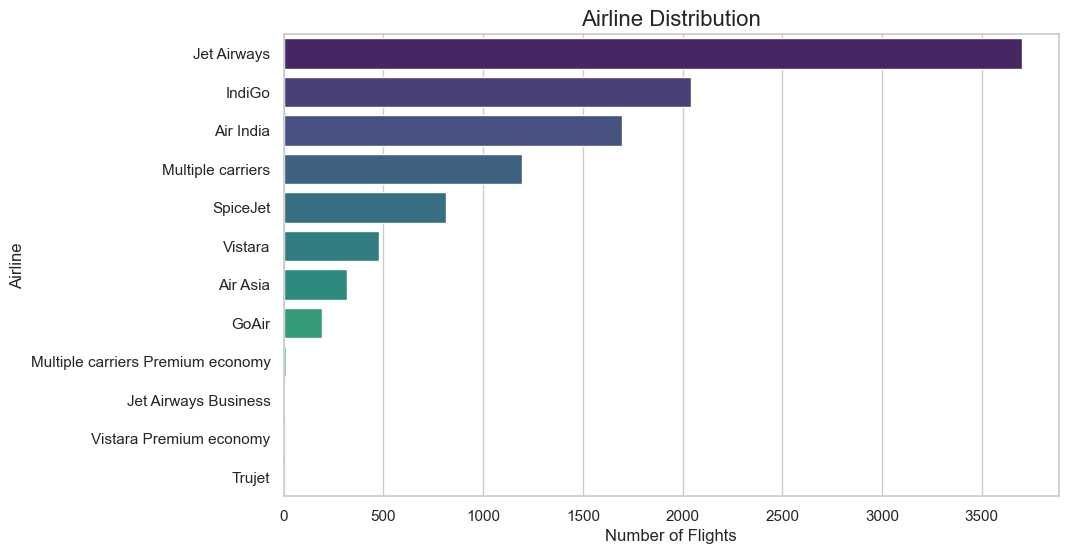

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# 1. Distribution of airlines (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(y='Airline', data=train_df, order=train_df['Airline'].value_counts().index, palette='viridis')
plt.title('Airline Distribution', fontsize=16)
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

## Insights from Airline flights distribution
- Jet Airways has the highest number of flights, followed by IndiGo. This suggests that Jet Airways is the most preferred airline.

In [49]:
train_df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

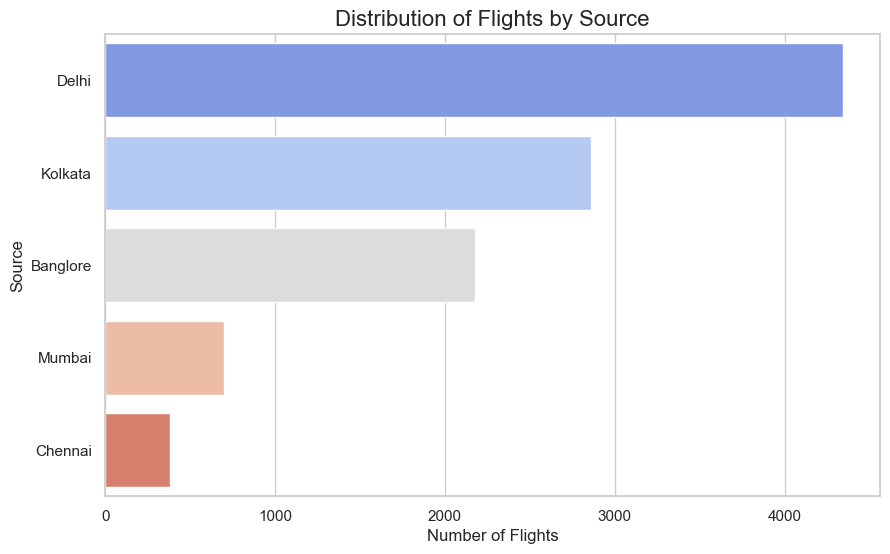

In [50]:
# 2. Source and destination analysis (Bar Plots)
plt.figure(figsize=(10, 6))
sns.countplot(y='Source', data=train_df, order=train_df['Source'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Flights by Source', fontsize=16)
plt.xlabel('Number of Flights')
plt.ylabel('Source')
plt.show()

## Insights from flights distribution by source
- Most flights take off from Delhi, followed by Kolkata.

In [51]:
train_df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

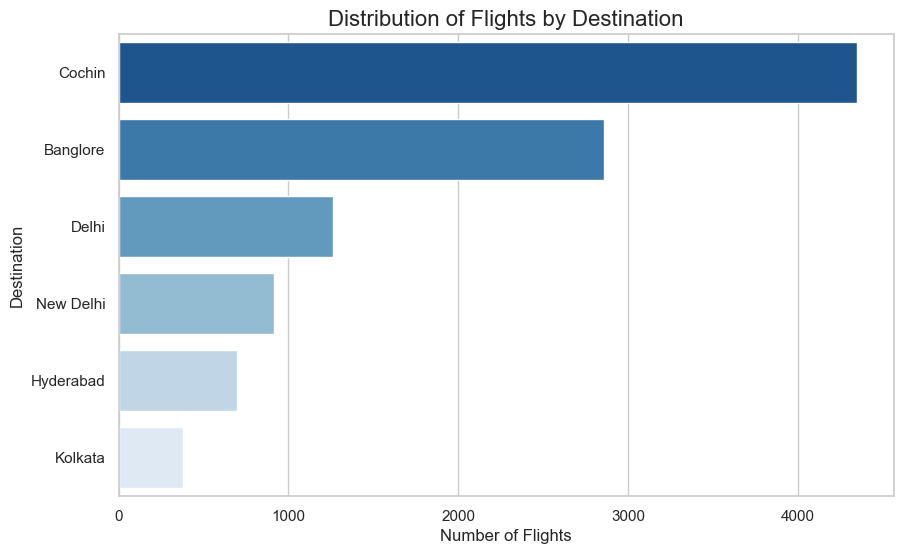

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Destination', data=train_df, order=train_df['Destination'].value_counts().index, palette='Blues_r')
plt.title('Distribution of Flights by Destination', fontsize=16)
plt.xlabel('Number of Flights')
plt.ylabel('Destination')
plt.show()

## Insights from flight distribution by destination
- Cochin is the most common destination for maximum flights, followed by Banglore

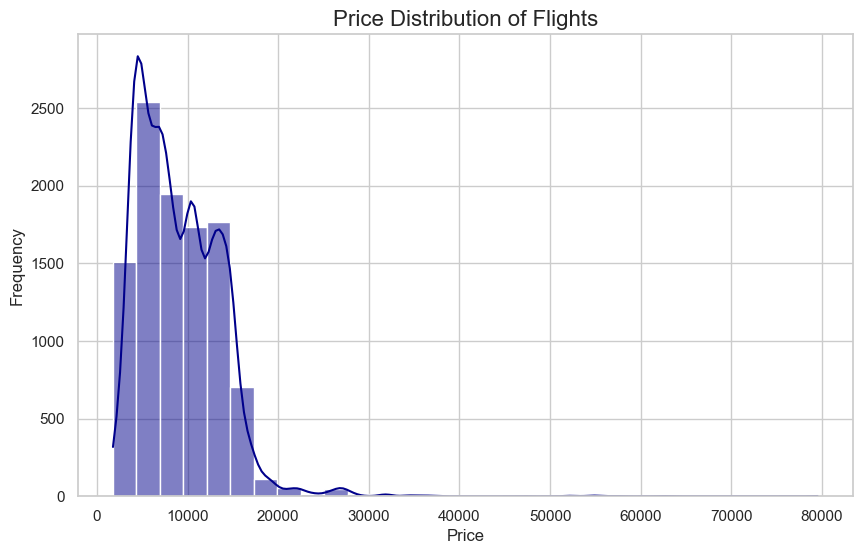

In [53]:
# 3. Price Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Price'], bins=30, kde=True, color='darkblue')
plt.title('Price Distribution of Flights', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Compare independent features with Target feature to check the 
impact on price 
a) Which airline has the highest price  
b) Check if the business class flights are high price or low and find 
only those flights which price is higher than 50k

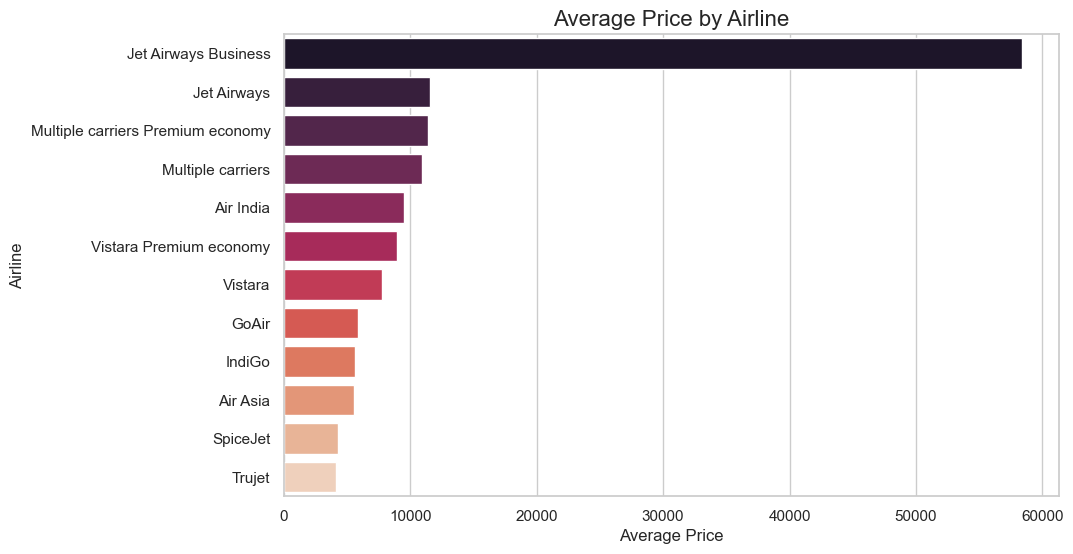

In [54]:
# Average price by airline
plt.figure(figsize=(10, 6))
airline_price = train_df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=airline_price.values, y=airline_price.index, palette='rocket')
plt.title('Average Price by Airline', fontsize=16)
plt.xlabel('Average Price')
plt.ylabel('Airline')
plt.show()

In [55]:
airline_price

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11599.021081
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9556.608028
Vistara Premium economy               8962.333333
Vistara                               7801.355649
GoAir                                 5861.056701
IndiGo                                5668.469897
Air Asia                              5590.260188
SpiceJet                              4335.841718
Trujet                                4140.000000
Name: Price, dtype: float64

## Insights
- Jet Airways Business Airline has the maximum average price followed by Jet Airways

In [56]:
# Filter business class flights
business_class_flights = train_df[train_df['Additional_Info'].str.contains('Business class', case=False)]

In [57]:
business_class_flights

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Depature_year,Depature_month,Depature_day
2904,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,2019,3,1
3010,Jet Airways,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097,2019,3,1
5312,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,2019,3,1
10160,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,2019,3,1


- above flighs are all business class flights and price is high

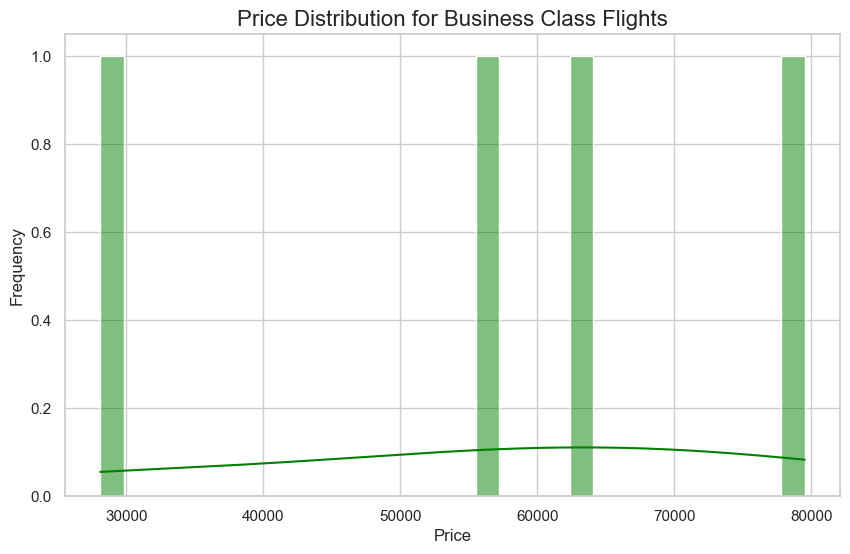

In [58]:
# Price distribution for business class flights
plt.figure(figsize=(10, 6))
sns.histplot(business_class_flights['Price'], bins=30, kde=True, color='green')
plt.title('Price Distribution for Business Class Flights', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [59]:
# c) Find flights with price higher than 50k
high_price_flights = business_class_flights[business_class_flights['Price'] > 50000]
print(high_price_flights[['Airline', 'Source', 'Destination', 'Price', 'Additional_Info']])

                    Airline    Source Destination  Price Additional_Info
2904   Jet Airways Business  Banglore   New Delhi  79512  Business class
5312   Jet Airways Business  Banglore   New Delhi  62427  Business class
10160  Jet Airways Business  Banglore   New Delhi  57209  Business class


Perform encoding for the required features according to the data

# Preprocessing the data

In [60]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Depature_year,Depature_month,Depature_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,1


In [133]:
train_df.drop('Route',axis=1,inplace=True)

In [134]:
test_df.drop('Route',axis=1,inplace=True)

In [135]:
train_df['Dep_Time'] = pd.to_datetime(train_df['Dep_Time'],format='%H:%M')
test_df['Dep_Time'] = pd.to_datetime(test_df['Dep_Time'],format='%H:%M')

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10462
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Source           10462 non-null  object        
 2   Destination      10462 non-null  object        
 3   Dep_Time         10462 non-null  datetime64[ns]
 4   Arrival_Time     10462 non-null  object        
 5   Duration         10462 non-null  object        
 6   Total_Stops      10462 non-null  object        
 7   Additional_Info  10462 non-null  object        
 8   Price            10462 non-null  int64         
 9   Depature_year    10462 non-null  int32         
 10  Depature_month   10462 non-null  int32         
 11  Depature_day     10462 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(7)
memory usage: 939.9+ KB


In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2645 non-null   object        
 1   Source           2645 non-null   object        
 2   Destination      2645 non-null   object        
 3   Dep_Time         2645 non-null   datetime64[ns]
 4   Arrival_Time     2645 non-null   object        
 5   Duration         2645 non-null   object        
 6   Total_Stops      2645 non-null   object        
 7   Additional_Info  2645 non-null   object        
 8   Depature_year    2645 non-null   int32         
 9   Depature_month   2645 non-null   int32         
 10  Depature_day     2645 non-null   int32         
dtypes: datetime64[ns](1), int32(3), object(7)
memory usage: 196.4+ KB


In [66]:
train_df.Dep_Time

0       1900-01-01 22:20:00
1       1900-01-01 05:50:00
2       1900-01-01 09:25:00
3       1900-01-01 18:05:00
4       1900-01-01 16:50:00
                ...        
10458   1900-01-01 19:55:00
10459   1900-01-01 20:45:00
10460   1900-01-01 08:20:00
10461   1900-01-01 11:30:00
10462   1900-01-01 10:55:00
Name: Dep_Time, Length: 10462, dtype: datetime64[ns]

In [136]:
train_df['Dep_hours'] = train_df['Dep_Time'].dt.hour
train_df['Dep_minutes'] = train_df['Dep_Time'].dt.minute

In [137]:
test_df['Dep_hours'] = test_df['Dep_Time'].dt.hour
test_df['Dep_minutes'] = test_df['Dep_Time'].dt.minute

In [138]:
train_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Depature_year,Depature_month,Depature_day,Dep_hours,Dep_minutes
0,IndiGo,Banglore,New Delhi,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,2019,5,1,5,50
2,Jet Airways,Delhi,Cochin,1900-01-01 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,9,9,25
3,IndiGo,Kolkata,Banglore,1900-01-01 18:05:00,23:30,5h 25m,1 stop,No info,6218,2019,5,12,18,5
4,IndiGo,Banglore,New Delhi,1900-01-01 16:50:00,21:35,4h 45m,1 stop,No info,13302,2019,3,1,16,50


In [139]:
test_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Depature_year,Depature_month,Depature_day,Dep_hours,Dep_minutes
0,Jet Airways,Delhi,Cochin,1900-01-01 17:30:00,04:25 07 Jun,10h 55m,1 stop,No info,2019,6,6,17,30
1,IndiGo,Kolkata,Banglore,1900-01-01 06:20:00,10:20,4h,1 stop,No info,2019,5,12,6,20
2,Jet Airways,Delhi,Cochin,1900-01-01 19:15:00,19:00 22 May,23h 45m,1 stop,In-flight meal not included,2019,5,21,19,15
3,Multiple carriers,Delhi,Cochin,1900-01-01 08:00:00,21:00,13h,1 stop,No info,2019,5,21,8,0
4,Air Asia,Banglore,Delhi,1900-01-01 23:55:00,02:45 25 Jun,2h 50m,non-stop,No info,2019,6,24,23,55


In [140]:
train_df.drop('Dep_Time',axis=1,inplace=True)
test_df.drop('Dep_Time',axis=1,inplace=True)

In [141]:
train_df.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,'4 stops':4},inplace=True)

In [142]:
test_df.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3,'4 stops':4},inplace=True)

In [143]:
train_df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Depature_year,Depature_month,Depature_day,Dep_hours,Dep_minutes
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,0,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2,No info,7662,2019,5,1,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2,No info,13882,2019,6,9,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1,No info,6218,2019,5,12,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1,No info,13302,2019,3,1,16,50


In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10462
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Arrival_Time     10462 non-null  object
 4   Duration         10462 non-null  object
 5   Total_Stops      10462 non-null  int64 
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   Depature_year    10462 non-null  int32 
 9   Depature_month   10462 non-null  int32 
 10  Depature_day     10462 non-null  int32 
 11  Dep_hours        10462 non-null  int32 
 12  Dep_minutes      10462 non-null  int32 
dtypes: int32(5), int64(2), object(6)
memory usage: 939.9+ KB


In [76]:
test_df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Depature_year,Depature_month,Depature_day,Dep_hours,Dep_minutes
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1,No info,2019,6,6,17,30
1,IndiGo,Kolkata,Banglore,10:20,4h,1,No info,2019,5,12,6,20
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1,In-flight meal not included,2019,5,21,19,15
3,Multiple carriers,Delhi,Cochin,21:00,13h,1,No info,2019,5,21,8,0
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,0,No info,2019,6,24,23,55


In [144]:
def preprocess_duration_to_minutes(duration_col):
    # Ensure 'h' is followed by a space for consistency
    duration_col = duration_col.str.replace('h', ' h ', regex=False)
    duration_col = duration_col.str.replace('m', ' m ', regex=False)
    
    # Extract hours and minutes from the 'Duration' column
    hours = duration_col.str.extract(r'(?P<hours>\d+)\s*h').fillna(0).astype(int)  # Extract hours and fill missing as 0
    minutes = duration_col.str.extract(r'(?P<minutes>\d+)\s*m').fillna(0).astype(int)  # Extract minutes and fill missing as 0
    
    # Compute the total duration in minutes
    total_duration_minutes = (hours['hours'] * 60) + minutes['minutes']
    
    return total_duration_minutes

In [145]:
# Apply the preprocessing to the Duration column
train_df['Duration_Minutes'] = preprocess_duration_to_minutes(train_df['Duration'])

In [146]:
train_df['Duration_Minutes']

0         170
1         445
2        1140
3         325
4         285
         ... 
10458     150
10459     155
10460     180
10461     160
10462     500
Name: Duration_Minutes, Length: 10462, dtype: int32

In [95]:
train_df.head(10)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Depature_year,Depature_month,Depature_day,Dep_hours,Dep_minutes,Duration_Minutes
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,0,No info,3897,2019,3,24,22,20,170
1,Air India,Kolkata,Banglore,13:15,7h 25m,2,No info,7662,2019,5,1,5,50,445
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2,No info,13882,2019,6,9,9,25,1140
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1,No info,6218,2019,5,12,18,5,325
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1,No info,13302,2019,3,1,16,50,285
5,SpiceJet,Kolkata,Banglore,11:25,2h 25m,0,No info,3873,2019,6,24,9,0,145
6,Jet Airways,Banglore,New Delhi,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,2019,3,12,18,55,930
7,Jet Airways,Banglore,New Delhi,05:05 02 Mar,21h 5m,1,No info,22270,2019,3,1,8,0,1265
8,Jet Airways,Banglore,New Delhi,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,2019,3,12,8,55,1530
9,Multiple carriers,Delhi,Cochin,19:15,7h 50m,1,No info,8625,2019,5,27,11,25,470


In [147]:
# Apply the preprocessing to the Duration column in test_df
test_df['Duration_Minutes'] = preprocess_duration_to_minutes(test_df['Duration'])

In [148]:
test_df['Duration_Minutes']

0        655
1        240
2       1425
3        780
4        170
        ... 
2640    1435
2641     155
2642     395
2643     915
2644     860
Name: Duration_Minutes, Length: 2645, dtype: int32

In [149]:
test_df.head(10)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Depature_year,Depature_month,Depature_day,Dep_hours,Dep_minutes,Duration_Minutes
0,Jet Airways,Delhi,Cochin,04:25 07 Jun,10h 55m,1,No info,2019,6,6,17,30,655
1,IndiGo,Kolkata,Banglore,10:20,4h,1,No info,2019,5,12,6,20,240
2,Jet Airways,Delhi,Cochin,19:00 22 May,23h 45m,1,In-flight meal not included,2019,5,21,19,15,1425
3,Multiple carriers,Delhi,Cochin,21:00,13h,1,No info,2019,5,21,8,0,780
4,Air Asia,Banglore,Delhi,02:45 25 Jun,2h 50m,0,No info,2019,6,24,23,55,170
5,Jet Airways,Delhi,Cochin,12:35 13 Jun,18h 20m,1,In-flight meal not included,2019,6,12,18,15,1100
6,Air India,Banglore,New Delhi,22:35,15h 5m,1,No info,2019,3,12,7,30,905
7,IndiGo,Kolkata,Banglore,20:30,5h 15m,1,No info,2019,5,1,15,15,315
8,IndiGo,Kolkata,Banglore,12:55,2h 45m,0,No info,2019,3,15,10,10,165
9,Jet Airways,Kolkata,Banglore,22:35,6h 5m,1,No info,2019,5,18,16,30,365


In [150]:
train_df.drop(['Arrival_Time','Duration'],axis=1,inplace=True)

In [151]:
test_df.drop(['Arrival_Time','Duration'],axis=1,inplace=True)

In [102]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Depature_year,Depature_month,Depature_day,Dep_hours,Dep_minutes,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,2019,3,24,22,20,170
1,Air India,Kolkata,Banglore,2,No info,7662,2019,5,1,5,50,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,2019,6,9,9,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,2019,5,12,18,5,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,2019,3,1,16,50,285


In [103]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Depature_year,Depature_month,Depature_day,Dep_hours,Dep_minutes,Duration_Minutes
0,Jet Airways,Delhi,Cochin,1,No info,2019,6,6,17,30,655
1,IndiGo,Kolkata,Banglore,1,No info,2019,5,12,6,20,240
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,2019,5,21,19,15,1425
3,Multiple carriers,Delhi,Cochin,1,No info,2019,5,21,8,0,780
4,Air Asia,Banglore,Delhi,0,No info,2019,6,24,23,55,170


In [104]:
for i in train_df.columns:
    print({i:train_df[i].unique()})

{'Airline': array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)}
{'Source': array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)}
{'Destination': array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)}
{'Total_Stops': array([0, 2, 1, 3, 4], dtype=int64)}
{'Additional_Info': array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)}
{'Price': array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)}
{'Depature_year': array([2019])}
{'Depature_month': array([3, 5, 6, 4])}
{'Depature_day': array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])}
{'Dep_hours':

In [105]:
for i in test_df.columns:
    print({i:test_df[i].unique()})

{'Airline': array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)}
{'Source': array(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype=object)}
{'Destination': array(['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata'],
      dtype=object)}
{'Total_Stops': array([1, 0, 2, 3, 4], dtype=int64)}
{'Additional_Info': array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)}
{'Depature_year': array([2019])}
{'Depature_month': array([6, 5, 3, 4])}
{'Depature_day': array([ 6, 12, 21, 24,  1, 15, 18,  3,  9, 27])}
{'Dep_hours': array([17,  6, 19,  8, 23, 18,  7, 15, 10, 16, 13,  9,  5, 21, 22, 20, 14,
        2, 11,  3, 12,  1,  4,  0])}
{'Dep_minutes': array([30, 20, 15,  0, 55, 10, 50

In [152]:
train_df.drop(['Depature_year'],axis=1,inplace=True)
test_df.drop(['Depature_year'],axis=1,inplace=True)

In [153]:
train_df.replace({'No Info':'No info'},inplace=True)

In [108]:
train_df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [109]:
test_df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [110]:
train_df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [111]:
test_df.Airline.unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [112]:
train_df[train_df.Airline=='Trujet']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Depature_month,Depature_day,Dep_hours,Dep_minutes,Duration_Minutes
2859,Trujet,Mumbai,Hyderabad,1,No info,4140,3,6,13,5,195


In [113]:
train_df[train_df.Airline=='Jet Airways Business']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Depature_month,Depature_day,Dep_hours,Dep_minutes,Duration_Minutes
657,Jet Airways Business,Banglore,New Delhi,1,No info,52229,3,1,5,45,300
2904,Jet Airways Business,Banglore,New Delhi,1,Business class,79512,3,1,5,45,340
5312,Jet Airways Business,Banglore,New Delhi,1,Business class,62427,3,1,5,45,400
7254,Jet Airways Business,Delhi,Cochin,2,No info,46490,3,3,20,5,500
9538,Jet Airways Business,Delhi,Cochin,2,No info,52285,3,6,20,5,500
10160,Jet Airways Business,Banglore,New Delhi,1,Business class,57209,3,1,9,45,280


In [ ]:
#train_df.replace({'No Info':'No info'},inplace=True)

In [ ]:
# Airline, Additional info check while encoding

# Label Encoding

In [154]:
colname=[]
for x in train_df.columns:
    if train_df[x].dtype=='object':
        colname.append(x)
colname

['Airline', 'Source', 'Destination', 'Additional_Info']

In [155]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    le.fit(train_df[x])
    train_df[x]=le.transform(train_df[x]) #train df
    test_df[x]=le.transform(test_df[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_))) #optional check labels
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Airline
mapping {'Air Asia': 0, 'Air India': 1, 'GoAir': 2, 'IndiGo': 3, 'Jet Airways': 4, 'Jet Airways Business': 5, 'Multiple carriers': 6, 'Multiple carriers Premium economy': 7, 'SpiceJet': 8, 'Trujet': 9, 'Vistara': 10, 'Vistara Premium economy': 11}
Feature Source
mapping {'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}
Feature Destination
mapping {'Banglore': 0, 'Cochin': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'New Delhi': 5}
Feature Additional_Info
mapping {'1 Long layover': 0, '1 Short layover': 1, '2 Long layover': 2, 'Business class': 3, 'Change airports': 4, 'In-flight meal not included': 5, 'No check-in baggage included': 6, 'No info': 7, 'Red-eye flight': 8}


In [156]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Depature_month,Depature_day,Dep_hours,Dep_minutes,Duration_Minutes
0,3,0,5,0,7,3897,3,24,22,20,170
1,1,3,0,2,7,7662,5,1,5,50,445
2,4,2,1,2,7,13882,6,9,9,25,1140
3,3,3,0,1,7,6218,5,12,18,5,325
4,3,0,5,1,7,13302,3,1,16,50,285


In [157]:
test_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Depature_month,Depature_day,Dep_hours,Dep_minutes,Duration_Minutes
0,4,2,1,1,7,6,6,17,30,655
1,3,3,0,1,7,5,12,6,20,240
2,4,2,1,1,5,5,21,19,15,1425
3,6,2,1,1,7,5,21,8,0,780
4,0,0,2,0,7,6,24,23,55,170


In [118]:
corr=train_df.corr()
print(corr)

                   Airline    Source  Destination  Total_Stops  \
Airline           1.000000 -0.012172     0.015942    -0.194549   
Source           -0.012172  1.000000    -0.589992     0.194203   
Destination       0.015942 -0.589992     1.000000    -0.291763   
Total_Stops      -0.194549  0.194203    -0.291763     1.000000   
Additional_Info  -0.075338 -0.015366     0.011240    -0.064786   
Price            -0.036491  0.013796    -0.065875     0.602013   
Depature_month    0.026083  0.181072    -0.362186     0.039003   
Depature_day      0.026482  0.005440    -0.040994    -0.018937   
Dep_hours        -0.032267  0.060218    -0.074056    -0.067523   
Dep_minutes      -0.062421 -0.056609     0.128523    -0.002695   
Duration_Minutes -0.153618  0.162808    -0.254243     0.727982   

                  Additional_Info     Price  Depature_month  Depature_day  \
Airline                 -0.075338 -0.036491        0.026083      0.026482   
Source                  -0.015366  0.013796        0.

# x and y split

In [29]:
X=train_df.drop('Price',axis=1)
Y=train_df['Price']

In [143]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Depature_month,Depature_day,Dep_hours,Dep_minutes,Duration_Minutes
0,3,0,5,0,7,3,24,22,20,170
1,1,3,0,2,7,5,1,5,50,445
2,4,2,1,2,7,6,9,9,25,1140
3,3,3,0,1,7,5,12,18,5,325
4,3,0,5,1,7,3,1,16,50,285


In [144]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10458     4107
10459     4145
10460     7229
10461    12648
10462    11753
Name: Price, Length: 10462, dtype: int64

In [122]:
X.shape

(10462, 10)

In [123]:
Y.shape

(10462,)

# Applying Linear Regression

# Assumptions of Linear Regression 

### Assumption: Linear regression must have no outliers

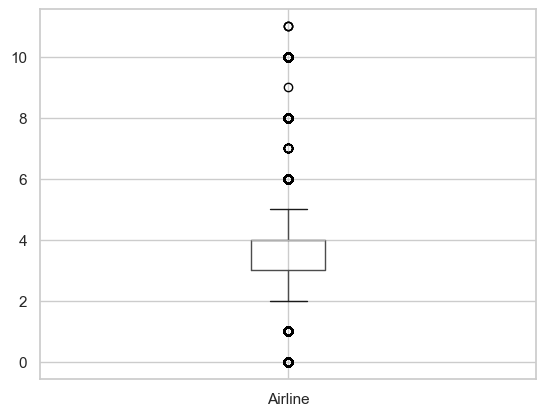

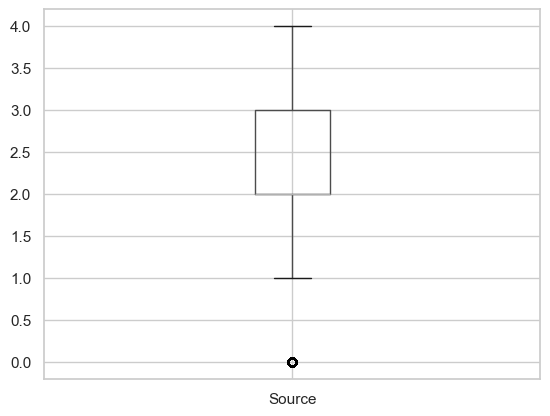

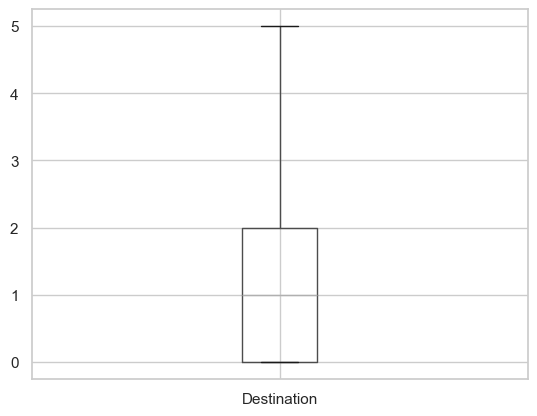

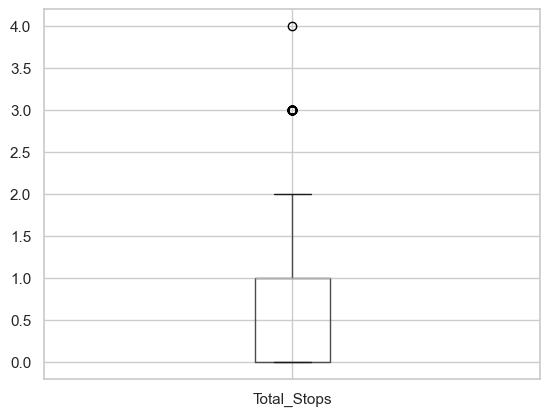

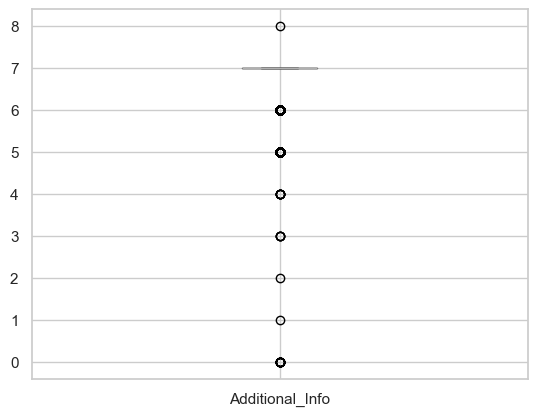

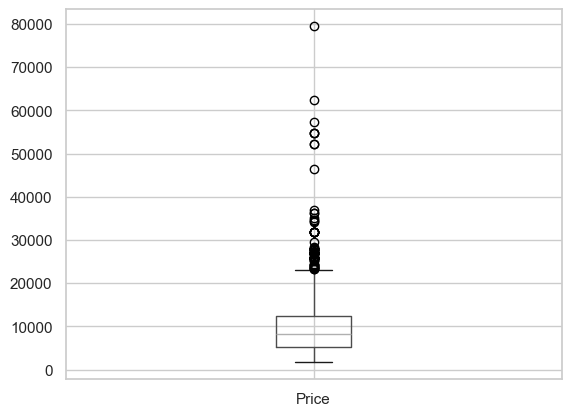

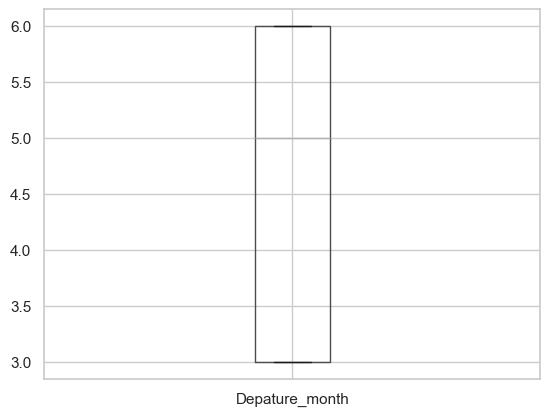

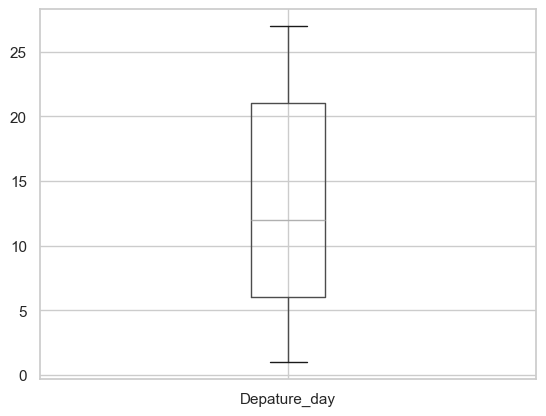

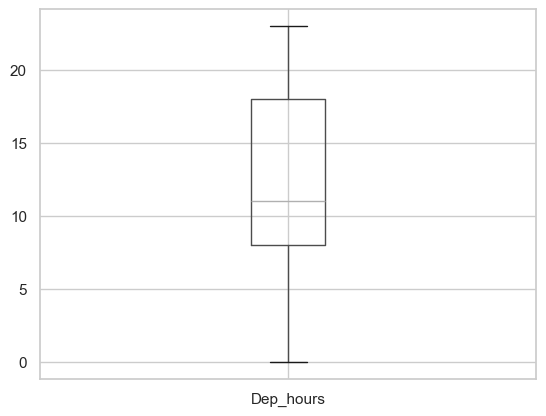

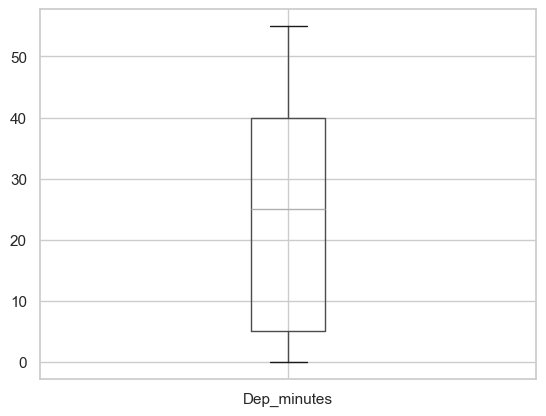

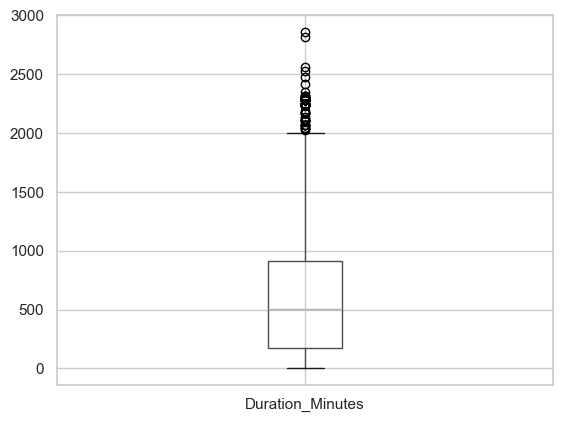

In [128]:
for i in train_df.columns:
    train_df.boxplot(column=i) #1 plot at a time
    plt.show()

### Insights:
- Price column has outliers but they can be real flight prices

# Assumption 2: Linearity: every ind var should have a linear relationship with dept var

In [129]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Depature_month', 'Depature_day', 'Dep_hours', 'Dep_minutes',
       'Duration_Minutes'],
      dtype='object')

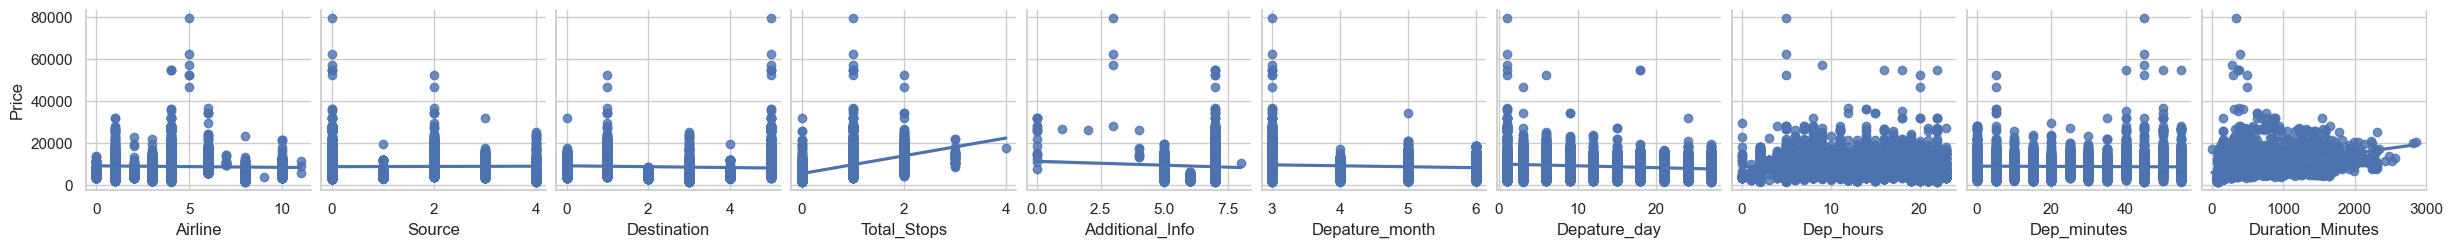

In [130]:
sns.pairplot(train_df,x_vars=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Depature_month', 'Depature_day', 'Dep_hours', 'Dep_minutes',
       'Duration_Minutes'],y_vars=['Price'],kind='reg')
plt.show()

- Duration_minutes has a moderate positive relationship with flight price.

# Assumption of normality: the dept var should follow an normal dist

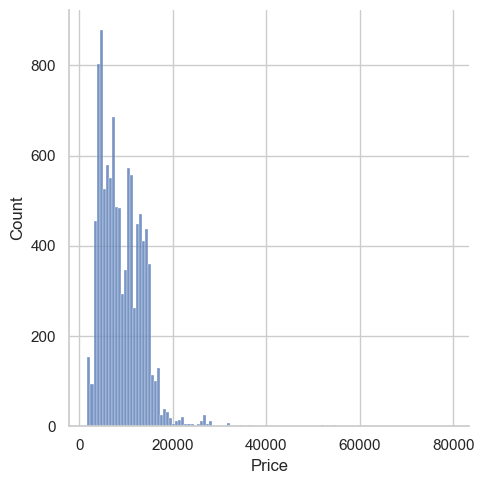

In [131]:
sns.displot(Y)
plt.show()

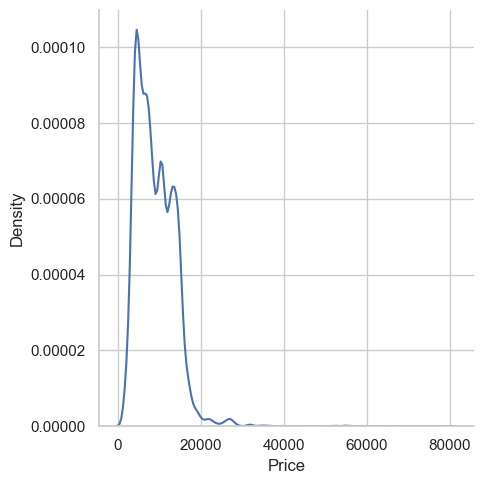

In [132]:
sns.displot(Y,kind='kde')
plt.show();

- Y Price does not follow a normal distribution it is slightly right skewed

In [136]:
#lets do log transformation to reduce skewness
Y_log= np.log1p(Y)

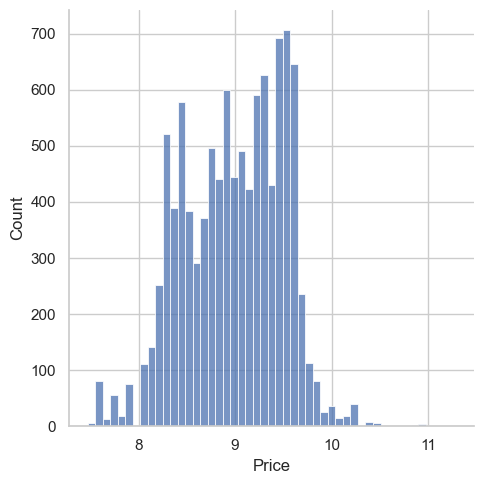

In [137]:
sns.displot(Y_log)
plt.show()

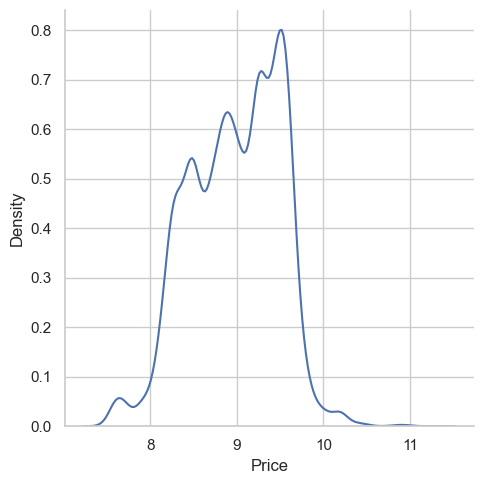

In [138]:
sns.displot(Y_log,kind='kde')
plt.show()

- Y price follows close to normal distribution after log transform

## check skewness for all continous x vars and log tranformation can be done if skewness exist 

histogram for Airline


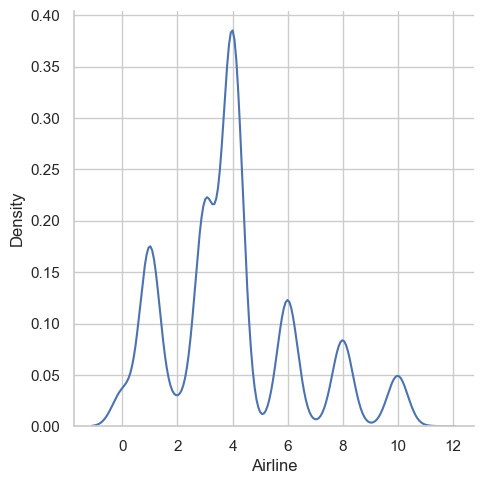

histogram for Source


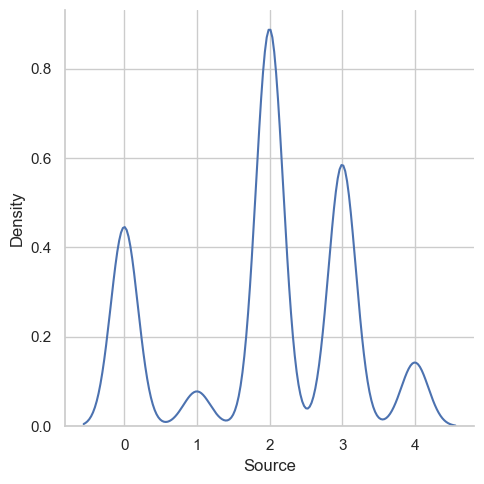

histogram for Destination


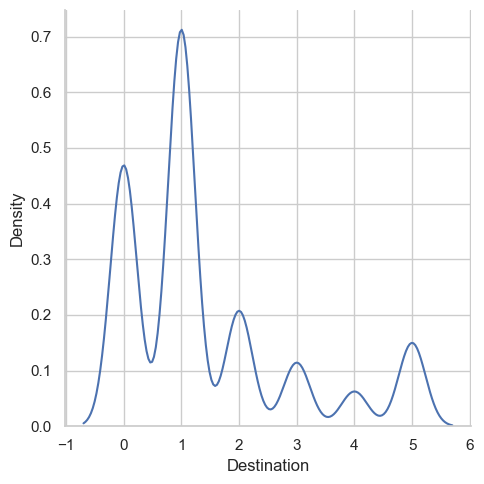

histogram for Total_Stops


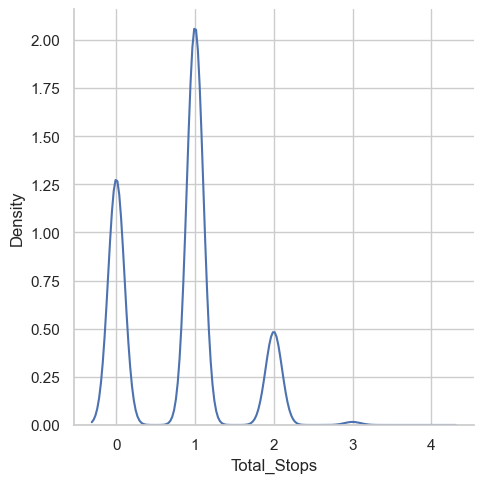

histogram for Additional_Info


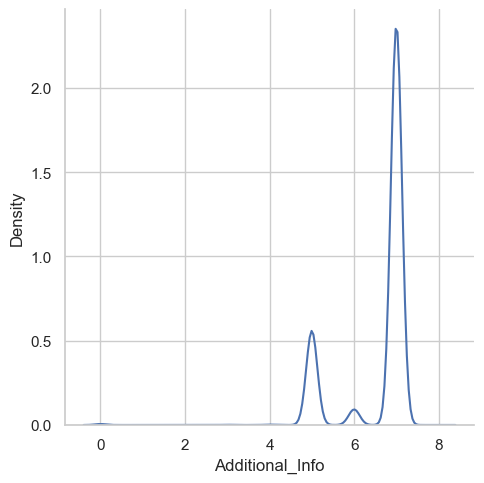

histogram for Price


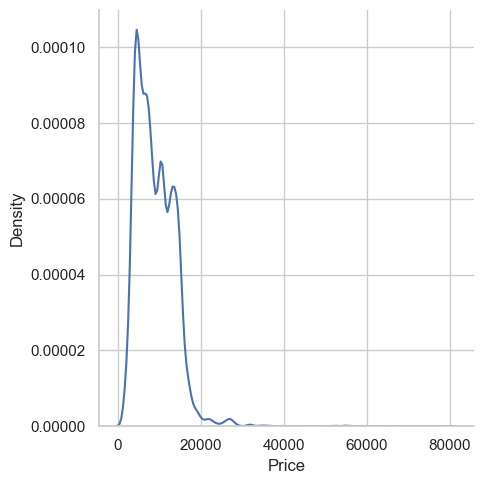

histogram for Depature_month


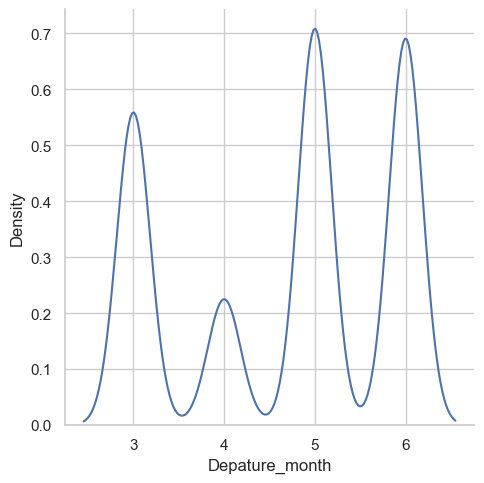

histogram for Depature_day


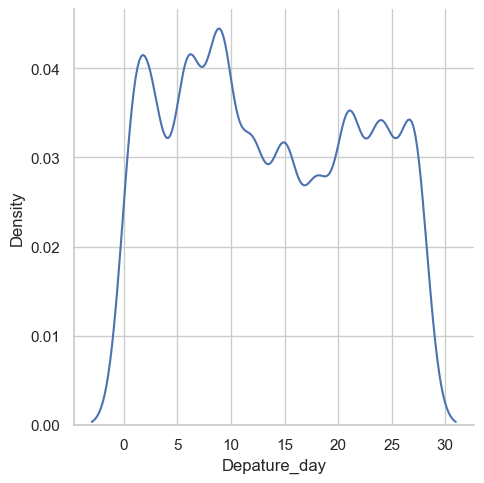

histogram for Dep_hours


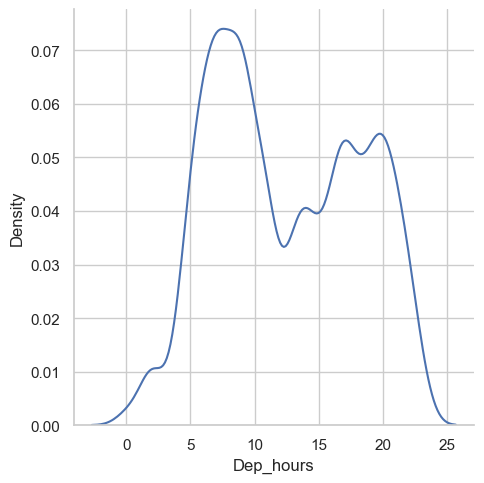

histogram for Dep_minutes


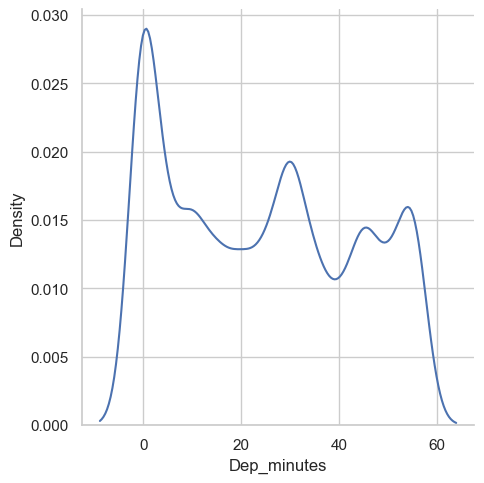

histogram for Duration_Minutes


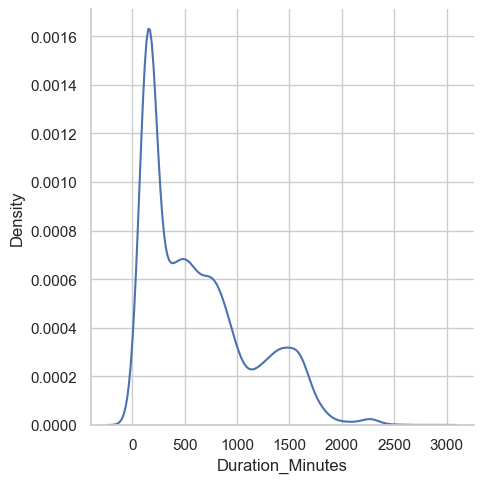

In [139]:
for i in train_df.columns:
    print('histogram for',i)
    sns.displot(train_df[i],kind='kde')
    plt.show()

In [140]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = train_df.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print()
print()
print(data_num_skewed)

Airline             0.723463
Source             -0.419609
Destination         1.224905
Total_Stops         0.332261
Additional_Info    -2.138334
Price               1.857224
Depature_month     -0.377480
Depature_day        0.124610
Dep_hours           0.108290
Dep_minutes         0.171276
Duration_Minutes    0.903843
dtype: float64


Destination         1.224905
Additional_Info    -2.138334
Price               1.857224
Duration_Minutes    0.903843
dtype: float64


In [141]:
skew(Y_log)

-0.22807374878629308

In [145]:
X['Duration_Minutes'] = np.log1p(X['Duration_Minutes'])

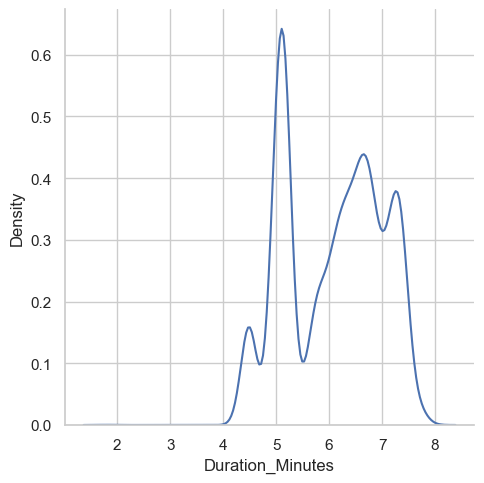

In [146]:
sns.displot(X['Duration_Minutes'],kind='kde')

In [147]:
skew(X['Duration_Minutes'])

-0.1480507942563249

- skewness removed from price and duration minutes

## Multicollinearity Assumption check

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] 
#shape is 3 cols i in range 0 to 2 cal vif for i col index and col values now i is dept var and vif is calculated
vif_df.round(2)

,features,VIF Factor
0,Airline,4.00
1,Source,5.35
2,Destination,3.07
3,Total_Stops,6.13
4,Additional_Info,40.00
5,Depature_month,17.36
6,Depature_day,3.47
7,Dep_hours,5.79
8,Dep_minutes,2.71
9,Duration_Minutes,66.06


In [ ]:
from sklearn.preprocessing import StandardScaler
 
scaler=StandardScaler()
scaler.fit(X)             
X=scaler.transform(X)
print(X)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] 
#shape is 3 cols i in range 0 to 2 cal vif for i col index and col values now i is dept var and vif is calculated
vif_df.round(2)

,features,VIF Factor
0,Airline,4.00
1,Source,5.35
2,Destination,3.07
3,Total_Stops,6.13
4,Additional_Info,40.00
5,Depature_month,17.36
6,Depature_day,3.47
7,Dep_hours,5.79
8,Dep_minutes,2.71
9,Duration_Minutes,66.06


- many variables have multicollinearity like departure month,duration_minutes but we do not drop any because of domain importance of these features

# Scaling the X variable

In [150]:
from sklearn.preprocessing import StandardScaler
 
scaler=StandardScaler()
scaler.fit(X)             
X=scaler.transform(X)
print(X)

[[-0.41491593 -1.64687738  2.40421327 ...  1.66257786 -0.2341234
  -1.04572146]
 [-1.26075586  0.88205718 -0.97201213 ... -1.30584146  1.36036441
   0.01792657]
 [ 0.00800403  0.03907899 -0.29676705 ... -0.60738986  0.03162457
   1.06014532]
 ...
 [ 0.00800403 -1.64687738  0.37847803 ... -0.78200276 -0.2341234
  -0.98266354]
 [ 2.5455238  -1.64687738  2.40421327 ... -0.25816406  0.29737254
  -1.11258028]
 [-1.26075586  0.03907899 -0.29676705 ... -0.43277696  1.62611238
   0.14694957]]


# Train test split

In [159]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y_log,test_size=0.2,random_state=10)

In [160]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8369, 10)
(8369,)
(2093, 10)
(2093,)


# Linear  Regression

In [161]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
# train the model object
lm.fit(x_train,y_train)

#print intercept and coefficients
print(lm.intercept_) #intercept_ param will give us y-intercept value B0 beta zero
print(lm.coef_) #coef_ param will give us slope coefficients values of each ind vars B1,B2,B3

8.979257989065683
[ 0.03333784 -0.0476371   0.00603576  0.18462647  0.00889987 -0.0422319
 -0.05965465  0.02000031 -0.02140606  0.23011828]


In [162]:
s=pd.DataFrame()
 
s["Column"]=train_df.drop(['Price'],axis=1).columns
s["LM slope coefficient"]=lm.coef_
 
s.sort_values("LM slope coefficient",ascending=False)

,Column,LM slope coefficient
9,Duration_Minutes,0.230118
3,Total_Stops,0.184626
0,Airline,0.033338
7,Dep_hours,0.020000
4,Additional_Info,0.008900
2,Destination,0.006036
8,Dep_minutes,-0.021406
5,Depature_month,-0.042232
1,Source,-0.047637
6,Depature_day,-0.059655


In [163]:
#predict all values test model using x_test
y_pred_lm=lm.predict(x_test)
print(y_pred_lm)

[9.04377222 8.67794954 9.00606288 ... 9.153712   9.05979586 8.64564624]


In [164]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_lm)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lm))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5974447489434604
RMSE: 0.3270810832202395
Adj R-square: 0.597059565467184


In [165]:
#Actual test y and pred y evaluations taking antilog of y
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(np.exp(y_test),np.exp(y_pred_lm))
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_lm)))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.416363721508741
RMSE: 3520.461431465857
Adj R-square: 0.415805271333168


# Tunning using Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
print(ridge.intercept_)
print(ridge.coef_)

In [167]:
#pair x column names and its slope coeffs
print(list(zip(train_df.drop('Price',axis=1).columns,ridge.coef_)))

[('Airline', 0.033329042998467756), ('Source', -0.04763189951577621), ('Destination', 0.0060279811790659036), ('Total_Stops', 0.18462395744984011), ('Additional_Info', 0.00889294994207093), ('Depature_month', -0.042229391675711776), ('Depature_day', -0.05964901939319482), ('Dep_hours', 0.019995692936926227), ('Dep_minutes', -0.02140373908288501), ('Duration_Minutes', 0.23008745419648768)]


In [168]:
y_pred_ridge=ridge.predict(x_test)

In [169]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_ridge)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_ridge))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5974444881598212
RMSE: 0.3270811891651765
Adj R-square: 0.5970593044340149


In [299]:
#Actual test y and pred y evaluations taking antilog of y
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(np.exp(y_test),np.exp(y_pred_ridge))
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_ridge)))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.4163663718802363
RMSE: 3520.4534380103737
Adj R-square: 0.4158079242406614


Note-
- the RMSE has lowered and Adj R-square has increased in Ridge model compare to Linear model, but R Square has reduced
- means imp features have been given more importance

# Lasso 

In [170]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
print(lasso.intercept_)
print(lasso.coef_)

8.979438062142192
[-0.  0. -0.  0. -0. -0. -0. -0. -0.  0.]


In [171]:
y_pred_lasso=lasso.predict(x_test)

In [172]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred_lasso)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lasso))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: -0.0003935698548254152
RMSE: 0.515618065468775
Adj R-square: -0.0013507926754692257


- Lasso model has converted all beta values for independent vars as 0
- eqn=B0
- thus excluding all vars, we drop lasso model

# Decision Tree

In [158]:
X1=train_df.drop('Price',axis=1)
Y1=train_df['Price']

In [159]:
from sklearn.preprocessing import StandardScaler
 
scaler=StandardScaler()
scaler.fit(X1)             
X1=scaler.transform(X1)
print(X1)

[[-0.41491593 -1.64687738  2.40421327 ...  1.66257786 -0.2341234
  -0.91832323]
 [-1.26075586  0.88205718 -0.97201213 ... -1.30584146  1.36036441
  -0.36906486]
 [ 0.00800403  0.03907899 -0.29676705 ... -0.60738986  0.03162457
   1.01906085]
 ...
 [ 0.00800403 -1.64687738  0.37847803 ... -0.78200276 -0.2341234
  -0.8983502 ]
 [ 2.5455238  -1.64687738  2.40421327 ... -0.25816406  0.29737254
  -0.93829626]
 [-1.26075586  0.03907899 -0.29676705 ... -0.43277696  1.62611238
  -0.25921318]]


In [160]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,Y1,test_size=0.3,random_state=10)

In [231]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(7323, 10)
(7323,)
(3139, 10)
(3139,)


In [260]:
#using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#create a model object
model_DecisionTree = DecisionTreeRegressor(random_state=10,criterion='squared_error',max_depth=12,min_samples_split=10) #,max_depth=6,min_samples_leaf=5
# train the model object
model_DecisionTree.fit(x_train1,y_train1) #trainig phase is building the DTree fit Tree

DecisionTreeRegressor(max_depth=12, min_samples_split=10, random_state=10)

In [261]:
y_pred=model_DecisionTree.predict(x_test1)
#print(y_pred)

In [262]:
model_DecisionTree.score(x_train1,y_train1) #training score R2 

0.910145651374722

In [263]:
#validation set score
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test1,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test1,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8387799058898875
RMSE: 1820.9110599362034
Adj R-square: 0.8386256430498625


# Feature importance by Decision Tree Regressor

In [237]:
#list of importance features by Decision Tree Regressor for predicting credit amount
sample=pd.DataFrame()
 
sample["Column"]=train_df.drop('Price',axis=1).columns
sample["Imp value"]=model_DecisionTree.feature_importances_
 
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
9,Duration_Minutes,0.457311
6,Depature_day,0.143984
0,Airline,0.120971
4,Additional_Info,0.055906
2,Destination,0.050697
3,Total_Stops,0.044707
5,Depature_month,0.044536
8,Dep_minutes,0.039813
7,Dep_hours,0.033550
1,Source,0.008524


# Random Forest

In [289]:
from sklearn.ensemble import RandomForestRegressor
#create a model object
model_RandomForest = RandomForestRegressor(random_state=10,n_estimators=200,bootstrap=True,n_jobs=-1)#,max_depth=7,min_samples_leaf=4
# train the model object
model_RandomForest.fit(x_train1,y_train1) #trainig phase is building the DTree Trees 500

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=10)

In [290]:
model_RandomForest.score(x_train1,y_train1) 

0.9754201950614654

In [291]:
y_pred_forest=model_RandomForest.predict(x_test1)
#print(y_pred_forest)

In [292]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test1,y_pred_forest)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test1,y_pred_forest))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8847592123753918
RMSE: 1539.5090899468616
Adj R-square: 0.8846489446616567


- Result have improved with DT and even better with random forest

# Adaboost

In [295]:
from sklearn.ensemble import AdaBoostRegressor

#create a model object
model_AdaBoost = AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=10),n_estimators=150,random_state=10)
# train the model object
model_AdaBoost.fit(x_train1,y_train1) #trainig phase is building the DTree fit Tree

y_pred_AdaBoost=model_AdaBoost.predict(x_test1)

In [296]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test1,y_pred_AdaBoost)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test1,y_pred_AdaBoost))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.854240354641503
RMSE: 1731.401542426632
Adj R-square: 0.8541008850736546


-  random forest model is giving better preformance than Adaboost regressor 

# XGBoost

In [161]:
from xgboost import XGBRegressor

#create a model object
model_XGBoost = XGBRegressor(n_estimators=500,random_state=10)
# train the model object
model_XGBoost.fit(x_train1,y_train1) #trainig phase is building the DTree fit Tree

y_pred_XGBoost=model_XGBoost.predict(x_test1)

In [162]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test1,y_pred_XGBoost)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test1,y_pred_XGBoost))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8856485873367036
RMSE: 1533.5569751484602
Adj R-square: 0.8855391706180515


- XGboost regressor model is giving better preformance than RF and other models

# Prediction on test_df using XGBoost Model

# Scale the test_df with training scaler object

In [164]:
test_df_scaled=scaler.transform(test_df)
print(test_df_scaled)

[[ 0.00800403  0.03907899 -0.29676705 ...  0.78951335  0.29737254
   0.05036881]
 [-0.41491593  0.88205718 -0.97201213 ... -1.13122856 -0.2341234
  -0.77851201]
 [ 0.00800403  0.03907899 -0.29676705 ...  1.13873915 -0.49987137
   1.58829226]
 ...
 [ 0.00800403  0.03907899 -0.29676705 ...  1.48796496  1.36036441
  -0.46893002]
 [-1.26075586  0.03907899 -0.29676705 ... -1.48045437 -1.29711527
   0.56966764]
 [ 0.85384395  0.03907899 -0.29676705 ... -1.48045437  1.62611238
   0.45981596]]


## XGBoost Regressor is the optimal model after tunning to 500 trees 

- Applied other models like Linear regression,Ridge,Lasso,Dtree,RF,Adaboost and tunned them still XGBoost is giving a good performance than others with a R-squared: 0.8856, RMSE: 1533.5569 ,Adj R-square: 0.8855

# Prediction on test_df and storing the predictions in result_df

In [165]:
test_pred_XGB=model_XGBoost.predict(test_df_scaled)
print(test_pred_XGB)
print(np.round(test_pred_XGB,0))

[13955.069  4209.05  12832.407 ... 16947.594 12260.633  7988.272]
[13955.  4209. 12832. ... 16948. 12261.  7988.]


In [166]:
result_df=pd.DataFrame(np.round(test_pred_XGB,0),columns=['Predicted Price'])
result_df

,Predicted Price
0,13955.0
1,4209.0
2,12832.0
3,10442.0
4,3238.0
...,...
2640,10548.0
2641,4189.0
2642,16948.0
2643,12261.0


In [309]:
test_df.shape

(2645, 10)

## Storing the predictions in a csv file

In [310]:
#result_df.to_csv('Flight_Price_Predictions_XGBoostRegressor_model.csv',index=False,header=True)

# Applying DL algorithm - ANN

In [32]:
from sklearn.model_selection import train_test_split

# Split into train, validation, and test sets
X_train2, X_temp, y_train2, y_temp = train_test_split(X1,Y1, test_size=0.3, random_state=42)
X_val, X_test2, y_val, y_test2 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
print(X_train2.shape)
print(y_train2.shape)
print(X_val.shape)
print(y_val.shape)

(7323, 10)
(7323,)
(1569, 10)
(1569,)


In [34]:
print(X_test2.shape)
print(y_test2.shape)

(1570, 10)
(1570,)


In [35]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [95]:
# Build the ANN model
model_ANN = Sequential([
    Dense(128, activation='relu', input_shape=(X_train2.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [96]:
model_ANN.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,937 (62.25 KB)

 Trainable params: 15,937 (62.25 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Compile the model
model_ANN.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [99]:
# Early stopping and learning rate reduction on plateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

In [100]:
# Train the model
history = model_ANN.fit(X_train2, y_train2, validation_data=(X_val, y_val), epochs=300, batch_size=32,callbacks=[early_stopping, reduce_lr])

Epoch 1/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 88623408.0000 - mae: 7939.2129 - val_loss: 13138990.0000 - val_mae: 2618.0200 - learning_rate: 0.0010
Epoch 2/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12398269.0000 - mae: 2545.7791 - val_loss: 11469074.0000 - val_mae: 2469.6836 - learning_rate: 0.0010
Epoch 3/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11700110.0000 - mae: 2429.6235 - val_loss: 10824207.0000 - val_mae: 2332.5161 - learning_rate: 0.0010
Epoch 4/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11877430.0000 - mae: 2390.4424 - val_loss: 10654905.0000 - val_mae: 2288.1150 - learning_rate: 0.0010
Epoch 5/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9900099.0000 - mae: 2286.8127 - val_loss: 10276091.0000 - val_mae: 2280.6045 - learning_rate: 0.0010
Epoch 6/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10099395.0000 - mae: 2269.1057 - val_loss: 10141242.0000 - val_mae: 2281.1421 - learning_rate: 0.0010
Epoch 7/300
229/229 ━━━

Epoch 43/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4954231.5000 - mae: 1412.2883 - val_loss: 5408317.5000 - val_mae: 1447.8070 - learning_rate: 0.0010
Epoch 44/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4963622.0000 - mae: 1402.5389 - val_loss: 5333432.0000 - val_mae: 1421.4584 - learning_rate: 0.0010
Epoch 45/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5554183.0000 - mae: 1435.7302 - val_loss: 5265050.5000 - val_mae: 1405.0526 - learning_rate: 0.0010
Epoch 46/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5407231.0000 - mae: 1396.7340 - val_loss: 5383865.5000 - val_mae: 1447.1372 - learning_rate: 0.0010
Epoch 47/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4679138.0000 - mae: 1359.8848 - val_loss: 5321220.0000 - val_mae: 1431.9829 - learning_rate: 0.0010
Epoch 48/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4680929.5000 - mae: 1394.3013 - val_loss: 5193170.5000 - val_mae: 1422.9973 - learning_rate: 0.0010
Epoch 49/300
229/229 ━━━━━━━

Epoch 125/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3607023.5000 - mae: 1092.2463 - val_loss: 3745860.7500 - val_mae: 1231.9120 - learning_rate: 2.5000e-04
Epoch 126/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3233116.5000 - mae: 1101.3649 - val_loss: 3733898.7500 - val_mae: 1229.7561 - learning_rate: 2.5000e-04
Epoch 127/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3481970.5000 - mae: 1127.2897 - val_loss: 3750936.2500 - val_mae: 1221.2336 - learning_rate: 2.5000e-04
Epoch 128/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3034403.2500 - mae: 1070.9999 - val_loss: 3672529.2500 - val_mae: 1213.3932 - learning_rate: 2.5000e-04
Epoch 129/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3799799.5000 - mae: 1128.0758 - val_loss: 3670183.0000 - val_mae: 1213.0679 - learning_rate: 2.5000e-04
Epoch 130/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3668392.7500 - mae: 1094.6115 - val_loss: 3663785.5000 - val_mae: 1216.0831 - learning_rate: 2.5000e-0

## Train and validation loss plot

In [101]:
EPOCHS=152

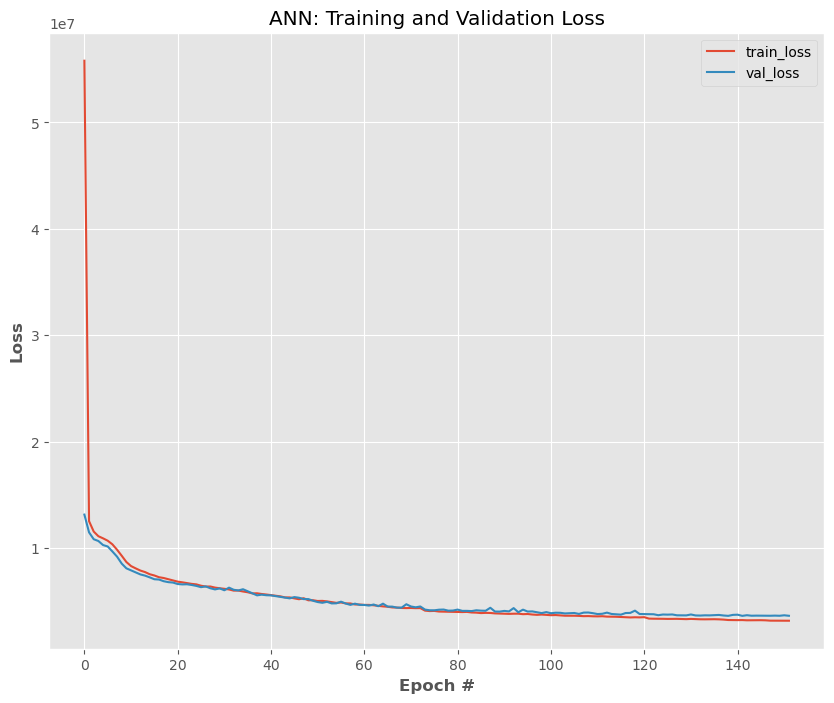

In [102]:
N= np.arange(0,EPOCHS)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,history.history['loss'],label='train_loss')
plt.plot(N,history.history['val_loss'],label='val_loss')
plt.title('ANN: Training and Validation Loss')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('Loss',weight='bold')
plt.legend()
plt.show()

## Train and validation mean absolute error plot

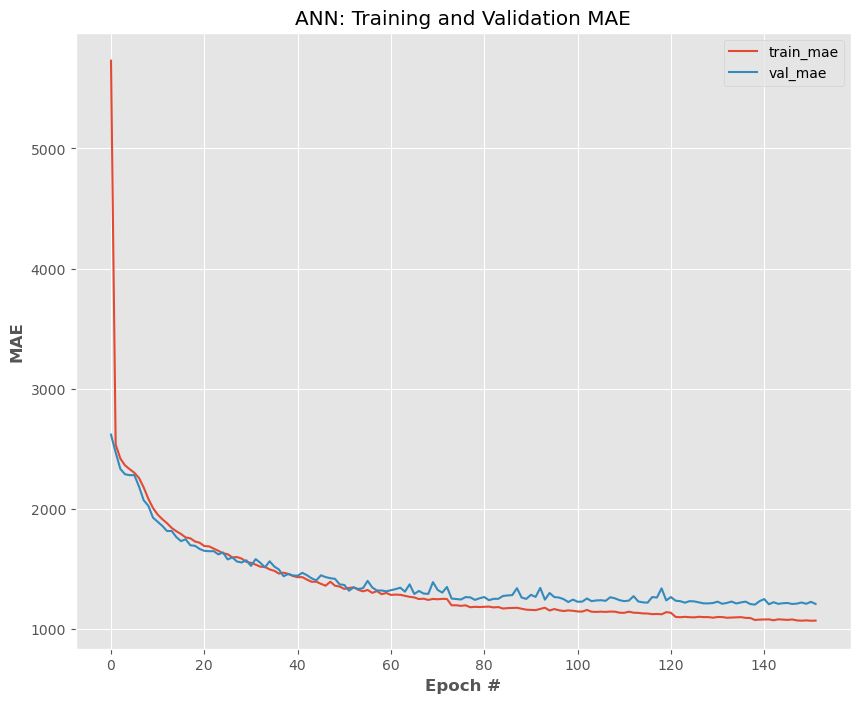

In [103]:
N= np.arange(0,EPOCHS)
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.plot(N,history.history['mae'],label='train_mae')
plt.plot(N,history.history['val_mae'],label='val_mae')
plt.title('ANN: Training and Validation MAE')
plt.xlabel('Epoch #',weight='bold')
plt.ylabel('MAE',weight='bold')
plt.legend()
plt.show()

In [104]:
# Evaluate the model
loss, mae = model_ANN.evaluate(X_val, y_val)
print(f"Mean Absolute Error on test set: {mae}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 3961920.7500 - mae: 1211.8651
Mean Absolute Error on test set: 1205.831787109375


## Evaluation of the model

In [105]:
y_pred_ANN = model_ANN.predict(X_test2)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [106]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test2,y_pred_ANN)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test2,y_pred_ANN))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y1)-1)/(len(Y1)-X1.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8339173701084386
RMSE: 1842.8667729881724
Adj R-square: 0.8337584545693595


###  Conclusion
- The ANN model gives good performance r2 as 0.8339, Adj r2 0.8337 and RMSE 1842.86 but as XGBoost Regressor model is giving
more better results final model is XGBOOST regressor model as shown above the test data is predicted and predictions are stored in csv file find the csv file in same folder.

- XGBoost model is the optimal model in this case with R-squared: 0.8856,
RMSE: 1533.5569 and
Adj R-square: 0.8855

- this is the result predictions by XGBoost model on test df steps are executed above ANN Model predictions are saved in csv file

In [170]:
result_df

,Predicted Price
0,13955.0
1,4209.0
2,12832.0
3,10442.0
4,3238.0
...,...
2640,10548.0
2641,4189.0
2642,16948.0
2643,12261.0


In [ ]:
#result_df.to_csv('Flight_Price_Predictions_XGBoostRegressor_model.csv',index=False,header=True)

## Conclusion:
- For the following data XGBoost regressor is an optimal model as it gives higher R square and low RMSE
- Jet Airways has higher number of flighs, also cost is higher as compared to other airlines, followed by Indigo that has second 
- higher number of flights but a moderate cost. Both are the most preferred Airlines as high frequency and good facilities.
- The business flights have lower frequency and high cost due to many additional facilities.
- Source Delhi has highest depatures followed by Kolkata. At Cochin and Banglore highest number of flights land as Banglore is an IT hub Cochin is a tourist and business destination.
- the flight price lies in range is from 2000 to 30000